notes for Chapter 1 of *Theoretical Neuroscience* by P. Dayan and L. F. Abbott.

// Many derivations in this book assumption circularity, such as firing rate, stimulus, spike train, etc.  

I think only stimulus is assumed circular, for conveninence of performing fft.

Conceptually, they present some (non-circular) stimulus for duration of $T$, and recorded the actual response, from some time very long before time 0 to some time very long after time $T$. Let's say "very long" is $T_1$. "Very long" means, before $-T_1$ or after $T+T_1$, the spontaneous spike train is either all zero all completely independent of stimulus. Then, for this trial, we can construct the spike train function $\rho(t)$ defined over $(-\infty, +\infty)$, with $t$ between $[-T_1, T+T_1]$ based on real data, and $t$ from other time points based on spontaneous spike train, or just assigning zero, depending on context. Then we start another trial.

By this process, we collected data for many trials, each being a spike train of infinite length.

This is why you usually see $-\infty$ and $+\infty$ when dealing with spike train in this book.

circular is some approximation and convenience.

for some additional discussion, see <https://github.com/leelabcnbc/book-notes/issues/2>, especially for the spike train correlation part.

## 1.2 Spike Trains and Firing Rates

### pp. 10, below Eq. (1.5) spiking probability from firing rate

>  If $\Delta t$ is small, there will never be more than one spike within the interval between $t$ and $t + \Delta t$ on any given trial. This means that $\mathbf{r}(t) \Delta t$ is also the fraction of trials on which a spike occurred between those times. Equivalently, $\mathbf{r}(t) \Delta t$ is the probability that a spike occurs during this time interval.

### pp. 10, below Eq. (1.6) interchangeability of trial average spike train and firing rate.

Comments on Eq. (1.6): I think trial average spike train is just some ideal stuff. You can never obtain it in real data. The writing here suggests that, we first have spike train, and then have firing rate as an average in the limit. I think it would be easier to think the other way round, which is how modeling is done in practice.

* The spike train is a sampling of the firing rate function
* we can use a large number of spike trains to recover the firing rate function.

This does not hold in some cases, such as spike-train autocorrelation function, in Eq. (1.35).

### pp. 11, below Eq. (1.7) three types of firing rates.

firing rate, spike-count rate, and average firing rate.

### pp. 11, Measuring firing rates.

There are a lot of options in measuring firing rate from finite data.

### pp. 14, Eq. (1.12) causal kernel window

this may or may not make sense. It depends.

### pp. 14 Tuning Curves

different tasks and neurons may be best described by different tuning curves.

* for motor neurons, people usually use cosine tuning curve. Notice that this would make it impossible to control the width of the tuning curve. However, Xiao Zhou told me that this is true for most of motor neurons (that they have a tuning with that is the same as that of cosine).
    * However, I think it's possible to introduce some width factor, changing $\cos(s-s_{max})$ to $\cos(w(s-s_{max}))$ 
    * <http://www.gatsby.ucl.ac.uk/~aguez/tn1/slides/popcoding-slides.pdf> has some more tuning curve models, such as wrapped Gaussian (not sure how to fit it; [wiki](https://en.wikipedia.org/wiki/Wrapped_normal_distribution) says it can be approximated well by von Mises).
    ![](./chapter_01/tuning_curve.png)

### pp. 16-17 spike-count variability.

two types of noise models are often used.

1. additive noise. noise distribution is independent of mean firing rate.
2. multiplicative noise. std of noise distribution is proportional to mean firing rate.

## 1.3 What Makes a Neuron fire?

### pp. 18 Describing the stimulus.

* Here they mentioned Weber's law and Fechner's law. It's used in many other works, such as [Constrained sampling experiments reveal principles of detection in natural scenes](http://dx.doi.org/10.1073/pnas.1619487114). Notice that in that paper. In that paper, they cited Weber's law, in the form that change of stimulus is linear to stimulus amplitude.
    * one potential problem is, should we use perceived stimulus amplitude or actual. I think using the latter makes less assumption.
* They assume that average stimulus amplitude is zero. I think in practice we just assume that neurons have adaptation and use the mean amplitude of stimulus as zero.

### pp. 19 periodic stimulus.

This is just a convenience for math analysis. Should not matter much in practice, if stimulus is long.

### pp. 19 STA 

Eq. (1.19) has some approximations. In practice, I think people just concatenate all trials into one big one, and we have no approximation. However, from a theoretic point of view as to connect STA to correlation as in Eq. (1.22), we should have multiple trials. The main reason we want to do this approximation is that we can use Eq. (1.2) and exchange of average sign with integral on right hand side of second equal sign for Eq. (1.19), and then use Eq. Eq. (1.6) to get right hand side of second equal sign for Eq. (1.20).

### pp. 20 Eq. (1.22) why STA is called reverse correlation.

### pp. 22 white noise stimuli.

1. we can't have ideal white noise stimuli that follow Eq. (1.24). We can only have stimuli that follow Eq. (1.25).
2. White and white Gaussian are different. White Gaussian is white, and white can be non-Gaussian. However, according to [Liam's paper Convergence properties of three spike-triggered analysis techniques](http://dx.doi.org/10.1088/0954-898X_14_3_304) or [here](http://www.stat.columbia.edu/~liam/research/pubs/sta-network.pdf), we'd better use Gaussian for theoretic gurantees. However, in practice, maybe other stimuli make excite neurons better. See [Spatiotemporal elements of macaque V1 receptive fields](https://doi.org/10.1016/j.neuron.2005.05.021)
3. above the title, "white noise has a flat power spectrum". I believe this is related to Wiener-Khinchin theorem in Chapter 5 of [Natural Image Statistics](http://www.naturalimagestatistics.net/) by Aapo Hyvärinen, Jarmo Hurri, and Patrik O. Hoyer.

### pp. 23 other spike triggered statistics.

* Fig. (1.10) shows that multiple-spike triggered statistics can not be decomposed into those of single-spike ones. Not sure how this holds or does not hold when using different stimuli.
* Spike-triggered average autocorrelation. Not sure what it is. I think it's some variation of Eq. (1.23), where a stimulus only counts when there's a spike, etc. In this sense, spike train acts as a weighting term.

## 1.4 Spike-Train Statistics

### pp. 24 definition of probability mass and density functions in spiking events.

> In other words, the probability $P[t_1, t_2, \ldots, t_n]$ that a sequence of $n$ spikes occurs with spike $i$ falling between times $t_i$ and $t_i + \Delta t$ for $i = 1,2,\ldots,n$ is given in terms of this density by the relation $P[t_1, t_2, \ldots, t_n] = p[t_1, t_2, \ldots, t_n](\Delta t)^n$. Here, $P$ and $p$ are defined over all possible spiking events happening over time $[0, T]$.

### pp. 25 different types of point processes

> If this dependence extends only to the immediately preceding event, so that the intervals between successive events are independent, the point process is called a renewal process. If there is no dependence at all on preceding events, so that the events themselves are statistically independent, we have a Poisson process.

Not sure about the exact definition of renewal process. Maybe defined in terms of conditional probability. The standard Poisson process we usually about is definitely a Poisson process here, as the standard Poisson process can be derived by taking the limit of a Bernoulli process of flipping coins. However, not sure if every statistically independent process must take this form as this paragraph claims. The claim that a standard Poisson process has independent events can be also seen from other aspects, such as the memoryless property of exponential distribution (the interspike interval distribution for (homogeneous) Poisson processes). See <https://en.wikipedia.org/wiki/Memorylessness>. As I guess a process with statistically independent events must be memoryless, and wiki says that only memoryless continuous distribution is exponential, I guess this implies that such a process must be Poisson.

### pp. 25 Eq. (1.26). 

This is a special case of Eq. (1.37). They factored it this way just to introduce Poisson distribution. It seems counterintuitive that we need to multiply an additional $n!$ factor when computing the probability for a specific order of spiking times, instead of dividing by it. But probably don't think too much about it.

This $n!$ factor may correspond to that in pp. 30.

> If the spike times are not ordered, so that, for example, we are interested in the probability density for any spike occurring at the time $t_1$, not necessarily the first spike, this expression should be divided by a factor of $n!$ to account for the number of different possible orderings of spike times.

This sounds weird. If we don't care about ordering, shouldn't we multiply, instead of dividing? Anyway.

### pp. 27 Eq. (1.34). coefficient of variation.

Notice that numerator is std, not var.

### pp. 28 Eq. (1.35). spike-train autocorrelation function.

I don't find statements about this function on pp. 28 convincing. Best way is to run a simulation.

First, let's simplify Eq. (1.35) a bit. I use $r$ for $\langle r \rangle$, as there's no confusion for doing that.

\begin{align}
Q_{\rho\rho}(\tau) &= \frac{1}{T} \int_0^T \mathrm{d}t \langle (\rho(t) - r) (\rho(t +\tau) -r) \rangle \\
                   &= \frac{1}{T} \int_0^T \mathrm{d}t \langle \rho(t)\rho(t +\tau) \rangle - \frac{1}{T} \int_0^T \mathrm{d}t \langle \rho(t)r \rangle - \frac{1}{T} \int_0^T \mathrm{d}t \langle \rho(t+\tau)r \rangle + \frac{1}{T} \int_0^T \mathrm{d}t r^2  \\
                   &= \frac{1}{T} \int_0^T \mathrm{d}t \langle \rho(t)\rho(t +\tau) \rangle - \frac{1}{T} \int_0^T \mathrm{d}t r^2  \quad \text{by eq. (1.6)}  \\
                   &= -r^2 + \frac{1}{T} \int_0^T \mathrm{d}t \langle \rho(t)\rho(t +\tau) \rangle 
\end{align}

So I only need to focus on second term of last line.

I will do exact integration, but with approximations to $\rho(t)$ and $\rho(t+\tau)$. Instead of using exact sum of delta function, which is impossible, I will approximate it with sum of tall and thin rectangles. I will show results for different widths of rectangles.

#### older stuff.

For the result and code, check <https://github.com/leelabcnbc/book-notes/blob/f83c9e61fc5d36aedf19d3fe8c71d831d45e90a1/books/TN/chapter_01.ipynb>

I compared three ways of computing this autocorrelation function, using three definitions I often see in the literature.

1. using Eq. (1.35).
2. using Eq. (1.35), without subtracting mean.
3. using my old way (in VR2014 paper) of computing CCH, first concatenating trials and then computing Pearson correlation coefficients at different lags. The implmentation here is a little different from that one, in terms of periodicity, and some implementation details, such as whether putting data of the same lags together or separately when computing Pearson correlation (these should not make much difference, for Poisson data).



actually, the second term in the last line is not well defined. See [here](https://math.stackexchange.com/questions/12944/what-is-product-of-delta-function-with-itself). However, I believe operationally, this term will generate a 1 for each pair of spikes with (circular) time lag of $\tau$ for the integral.

I think whether I assume circular or not, it's not going to be a problem, when $T$ is long. At least the result should be correct for $\tau$ near zero. They claim "By contrast, the intervals between any two spikes (not necessarily adjacent) in such a train are uniformly distributed." above Eq. (1.36), and I think this only works when you assume circular, or assume $T$ is very long.

In any case, the problem in <https://github.com/leelabcnbc/book-notes/issues/2> won't be solved.

In [1]:
# here, I will see, at different binning granularities, the value of function defined by Eq. (1.35),
# for a homogeneous Poisson process.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import RandomState
from scipy.stats import poisson, pearsonr
from joblib import Parallel, delayed
from scipy.spatial.distance import squareform
# sec.
# actually we do periodic. this is same as very large T.
T_this = 4
# number of trials to collect spikes.
num_trial_this = 5000
# average number of spike per sec.
firing_rate_this = 10

# if we have k here, we wil use 2k+1 bins to divide T seconds.
# this makes sure that we have the center bin reserved for \tau=0 case.
# num_bin_half_list = (100,
#                      250,
# #                    300,
# #                    400,
#                      500,
# #                    1000,
# #                    2000,
#                     )

delta_t_list = (
#     0.1,
#     0.01,
#     0.001,
    0.0001,
)




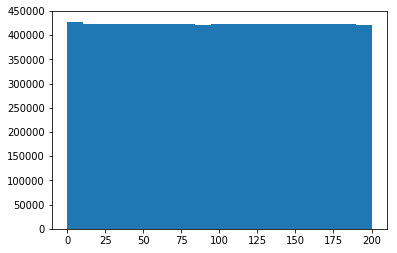

In [2]:

def generate_one_spike_train(T, firing_rate, seed):
    # generate the time of spikes for time [0,T] with rate `firing_rate` spikes per second.
    mean_num_spike = T*firing_rate
    rng_state_this = RandomState(seed=seed)
    num_spike_actual = poisson.rvs(mean_num_spike, random_state=rng_state_this)
    return rng_state_this.rand(num_spike_actual)*T


def compute_abs_distance_between_all_spikes(train_this, T):
    assert train_this.shape == (train_this.size,)
    # ok. first compute pairwise
    train_this_longer = train_this + T
    
    distance_pair = (train_this_longer[:,np.newaxis]-train_this) % T
    
    # they should have symmetry.
    off_diag_index = np.logical_not(np.eye(train_this.size, dtype=np.bool_))
    a = distance_pair[off_diag_index]+distance_pair.T[off_diag_index]
    assert np.allclose(distance_pair[off_diag_index]+distance_pair.T[off_diag_index],
                       T, atol=1e-4)
    
    
    assert np.all(distance_pair>=0) and np.all(distance_pair<=T)
    distance_pair = np.minimum(distance_pair, T-distance_pair)
    
    assert distance_pair.shape == (train_this.size,train_this.size)
    distance_pair[np.diag_indices(train_this.size)] = 0
    assert np.all(distance_pair>=0) and np.all(distance_pair<=T/2)
    # check summing to T for non diagonal stuff.
    # we can think those greater than T/2 stuff as negative \tau.
    assert np.allclose(distance_pair, distance_pair.T, atol=1e-4)
    # return all distances in [-T/2, T/2].
    return np.concatenate((squareform(distance_pair, checks=False), np.zeros_like(train_this),
                           -squareform(distance_pair, checks=False)), axis=0)
    # return distance_pair.ravel()

# test.

# somehow using small T won't do.
spike_this = generate_one_spike_train(T_this*100, firing_rate_this, 0)
# roughly uniform. if you chnage to T=500, it will be more uniform.
plt.close('all')
plt.hist(compute_abs_distance_between_all_spikes(spike_this, T_this*100), np.linspace(0, T_this/2*100, 20))
plt.show()


In [3]:
def compute_integral_one_spike_train_dist(distance_pair, tau, bin_size, T, num_trial):
    # I will approximate each delta(t) as a rectangle centered at zero with width bin_size and height 1/bin_size
    # this computes (actually circular)  1/T \int_0^T \rho(t) \rho(t+\tau) d t.
    
    # only pairs with dist \in (tau-bin_size, tau+bin_size) are worth considering.
    #assert np.isscalar(tau) and (0 <= tau <= T/2)
    pair_good_index = np.logical_and(distance_pair>tau-bin_size, distance_pair<tau+bin_size)
    pair_good = distance_pair[pair_good_index]
    pair_good_overlap = bin_size-abs(pair_good-tau)
    assert np.all(pair_good_overlap>=0) and np.all(pair_good_overlap<=bin_size)
    # then we can compute their actual contribution.
    # height is always 1/(bin_size*bin_size), width is pair_good_overlap
    return (pair_good_overlap.sum()*(1/(bin_size*bin_size)))/(T*num_trial)

def compute_integral_one_spike_train_dist_batch(distance_pair_all, tau_batch, bin_size, T, num_trial):
    # joblib call.
    a = Parallel(n_jobs=-1, verbose=5)(delayed(compute_integral_one_spike_train_dist)(distance_pair_all,
                                                                                      tau, bin_size, T, num_trial) for tau in tau_batch)
    return np.array(a)

def gen_and_dist_a_train(T, firing_rate, seed):
    return compute_abs_distance_between_all_spikes(generate_one_spike_train(T, firing_rate, seed), T)
    
def generate_all_disted_trains(T, firing_rate, num_train):
    all_results = Parallel(n_jobs=-1, verbose=3)(delayed(gen_and_dist_a_train)(T,
                                                                             firing_rate,
                                                                             c) for c in range(num_train))
    return all_results

In [4]:
all_train_d = generate_all_disted_trains(T_this, firing_rate_this, num_trial_this)
all_train_d_flat = np.concatenate(all_train_d)

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    0.8s finished


0.0001


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 3026 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 3512 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  9.2min

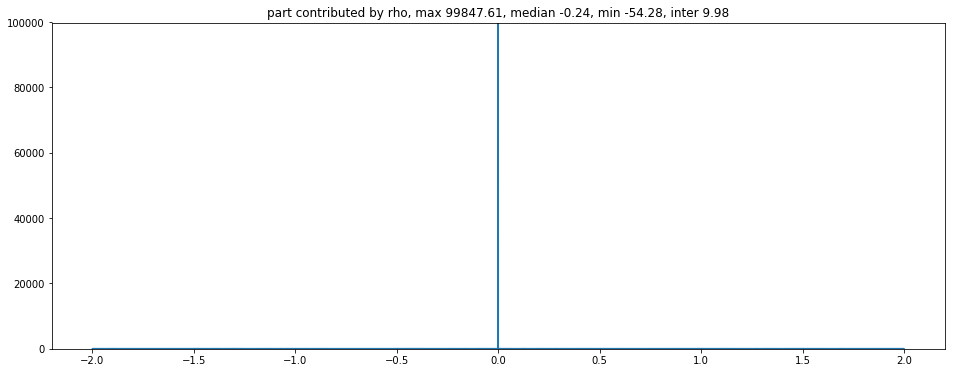

In [5]:
num_bin_half = 5000
num_bin_integral = 50
ticks = np.linspace(-T_this/2, T_this/2, num_bin_half*2+1)
tick_space = T_this/(2*num_bin_half)
#ticks_to_try = ticks[num_bin_half:]
for delta_t_this in delta_t_list:
    print(delta_t_this)
    
    result_this = compute_integral_one_spike_train_dist_batch(all_train_d_flat, ticks, delta_t_this, T_this, num_trial_this)
    result_this = result_this - firing_rate_this**2
    
    # I will need to compute the integral
    # around, say, num_bin_integral*2+1 bins in the center.
    
    inter_center = result_this[num_bin_half-num_bin_integral:num_bin_half+num_bin_integral+1].sum()*tick_space/T_this
    
    plt.close('all')
    fig, axes = plt.subplots(1,1,figsize=(16, 6), squeeze=False)
    axes = axes.ravel()
    axes[0].plot(ticks, result_this)
    # title is wrong. don't have "part contributed by rho" part.
    axes[0].set_title('part contributed by rho, max {:.2f}, median {:.2f}, min {:.2f}, inter {:.2f}'.format(
        result_this.max(), np.median(result_this), result_this.min(), inter_center
    ))
    axes[0].set_ylim(result_this.min(), result_this.max())
    
    
#     axes[1].plot(ticks, result_this_no_mean)
#     axes[1].set_title(f'without correction, {num_bin_half*2+1} bins, {result_this_no_mean.max()}, {np.median(result_this_no_mean)}')
#     axes[1].set_ylabel('multiple of dirac func at each bin')
#     axes[2].plot(ticks, result_this_corr)
#     axes[2].set_title(f'pearson r, {num_bin_half*2+1} bins')
    plt.show()

ssems that Eq. (1.35) can be true, for some reason.

#### older stuff.

my take is that text below Eq. (1.35) can be wrong.

* First, I think the uncorrected version of Eq. (1.35) can approach Eq. (1.36), according to my simulations, with smaller and smaller bins. You may wonder what happens with more and more trials, or more and more accurate averaging. I think that will only result in less variation in my estimate, insteading making my estimate keep getting larger or smaller.
* Second, Eq. (1.35) seems to have the problem of inconsistent units. The term for spike train seems to have unit of firing rate $s^{-1}$, yet term for average spike train has unit of firing rate square, or $s^{-2}$
* There are even more definitions on this type of measure. See Harrison, M.T., Amarasingham, A., and Kass, R.E. (2013) Statistical identification of synchronous spiking. In Spike Timing: Mechanisms and Function, edited by P. Di Lorenzo and J. Victor. Taylor and Francis, pp. 77--120. [PDF from Rob Kass's website](http://www.stat.cmu.edu/~kass/papers/SynchronyReview.pdf)
* Regardless of measure, I guess the net results are similar, at least for homogeneous Poisson.

### pp. 30 The Poisson Spike Generator

Check Byron's notes.

### pp. 31 Comparison with Data

Also check Byron's notes. I think main takeaways are

1. Poisson, with refractory modeling, is accurate enough.
2. A lot of variability can't be explained by Poisson process alone. Check Figure 1.17.

## 1.5 The Neural Code

### pp. 36 for single neuron, rate coding is probably all we need.

> Although this is not impossible, we view it as unlikely and feel that the evidence for independent-spike coding, at least as a fairly accurate approximation, is quite convincing.

### pp. 36 for population coding, independence assumption does not hold so well.

Check examples like place cell.

### pp. 38 difficult to tell part stimulus-driven and non-stimulus-driven firing rate changes.

> The interplay between stimulus and encoding dynamics makes the identification of a temporal code difficult.

### pp. 38 rate code vs temporal code.

> **The issue of temporal coding is distinct and independent from the issue of independent-spike coding discussed above.** If the independent-spike hypothesis is valid, the temporal character of the neural code is determined by the behavior of $r(t)$. If $r(t)$ varies slowly with time, the code is typically called a rate code, and if it varies rapidly, the code is called temporal.

Below, there is some discussion on the definition of temporal code. Well... it's just fast changing rate code, to me.

## 1.7 Appendices

### A

* two definitions of power spectrum. They both assume periodicity. I think the second one is more commonly seen.
* here the Fourier transform used is fourier series, decomposing a periodic signal as an infinite sum of exponentials.
* they introduced definition of periodogram, and they say it's very noisy. However, I think it's commonly used...
* check errata. there are some notation errors.

#### notes on Eq. (1.42)

Basically you use definition of stimulus autocorrelation function and then switch order of integration, etc.

> The second integral, because of the periodicity of the integrand (when $\omega$ is an integer multiple of $2 \pi / T$)

The second integral, after change of variable from $\tau$ to $t+\tau$, has limits $-T/2 + t$ to $T/2+t$. Notice that when $\omega$ is an integer multiple of $2 \pi / T$, the exponential term in integrand has a period of $T$. Thus the whole integral is periodic.

### B

here derivation is different from that in Byron Yu's notes. In the notes, that Poisson distribution has a normalized probability mass function is assumed. Here it's not.


### C Inhomogeneous Poisson Statistics

Informally, we should understand Eq. (1.57) in the following way.

* the event of having spikes at $t_1, \ldots, t_n$ during time $[0, T]$, up to precision of $\Delta t$, is the combination of the following events.
    1. having spikes in $[t_1, t_1+ \Delta t], ..., [t_n, t_n+ \Delta t]$.
    2. not having spikes in other time windows.
* by taking the product of the probability of all these events, we get probability density $P[t_1, t_2, \ldots, t_n]$ (up to $\Delta t$).
* dividing this quantity by $(\Delta t)^n$, and taking $\Delta t$ to zero, we get Eq. (1.57).